In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering



In [2]:

X = [[5,5],
     [15,15],[15.5,16.4],[16.16,15],[15,16],[15,17],[17,15],[17.4,14],[16,15],[16,16],[15,15.5],
     [-5,-3],[-4.5,-4.5],[-5,-4],[-5,-6],[-6,-3],[-6,-4],[-4,-5],[-3,3],[-3.4,3],[-4.4,3.4],[-3,5],[-4,3],[-4,4],[-5,4],
    [10,12],[9.4,8.7],[7.9,10],[8.5,8],[11,10],[9.3,7.3],[10,9.5],[10.5,11.3],[8.5,8.5],[7.5,9.4],[11.5,11],
    [2,0],[2.3,-1],[3,-2],[3.4,-3],[4,-2],[4,-1],[1,-2],[1,-3],[1,-1],[1.5,-2]]

import numpy as np

X = np.array(X)
X

array([[ 5.  ,  5.  ],
       [15.  , 15.  ],
       [15.5 , 16.4 ],
       [16.16, 15.  ],
       [15.  , 16.  ],
       [15.  , 17.  ],
       [17.  , 15.  ],
       [17.4 , 14.  ],
       [16.  , 15.  ],
       [16.  , 16.  ],
       [15.  , 15.5 ],
       [-5.  , -3.  ],
       [-4.5 , -4.5 ],
       [-5.  , -4.  ],
       [-5.  , -6.  ],
       [-6.  , -3.  ],
       [-6.  , -4.  ],
       [-4.  , -5.  ],
       [-3.  ,  3.  ],
       [-3.4 ,  3.  ],
       [-4.4 ,  3.4 ],
       [-3.  ,  5.  ],
       [-4.  ,  3.  ],
       [-4.  ,  4.  ],
       [-5.  ,  4.  ],
       [10.  , 12.  ],
       [ 9.4 ,  8.7 ],
       [ 7.9 , 10.  ],
       [ 8.5 ,  8.  ],
       [11.  , 10.  ],
       [ 9.3 ,  7.3 ],
       [10.  ,  9.5 ],
       [10.5 , 11.3 ],
       [ 8.5 ,  8.5 ],
       [ 7.5 ,  9.4 ],
       [11.5 , 11.  ],
       [ 2.  ,  0.  ],
       [ 2.3 , -1.  ],
       [ 3.  , -2.  ],
       [ 3.4 , -3.  ],
       [ 4.  , -2.  ],
       [ 4.  , -1.  ],
       [ 1.  , -2.  ],
       [ 1.

In [7]:

X = [[0,0],[5,0],[5,5],[0,5],[-5,5],[-5,0],[-5,-5],[0,-5],[5,-5]]

import numpy as np

X = np.array(X)

In [8]:
x = []
y = []
for i in range(len(X)):
    x.append(X[i][0])
    y.append(X[i][1])
x    

[0, 5, 5, 0, -5, -5, -5, 0, 5]

In [9]:
import plotly.express as px
fig = px.scatter(x= x, y= y )
fig.show()

In [18]:
from scipy.spatial import distance
distance.cosine(X[1], X[2])

0.29289321881345254

In [5]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

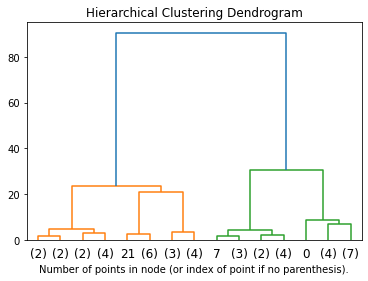

In [6]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [7]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=8, n_clusters=None)

model = model.fit(X)

In [8]:
labels = model.labels_.tolist()
nocluster = set(labels)
totalcluster = len(nocluster)
totalcluster

6

In [9]:
cluster_dict = {}

i = 0
for i in range(len(labels)):
    if labels[i] not in cluster_dict.keys():
         cluster_dict[labels[i]] = [i]
    else:
          cluster_dict[labels[i]].append(i)
    i+=1

In [10]:
for i in range(totalcluster):
    print(len(cluster_dict[i]))

11
10
10
7
7
1


In [11]:
X[cluster_dict[0]]

array([[10. , 12. ],
       [ 9.4,  8.7],
       [ 7.9, 10. ],
       [ 8.5,  8. ],
       [11. , 10. ],
       [ 9.3,  7.3],
       [10. ,  9.5],
       [10.5, 11.3],
       [ 8.5,  8.5],
       [ 7.5,  9.4],
       [11.5, 11. ]])

In [12]:
outlier_cluster = []
for i in range(totalcluster):
    if len(cluster_dict[i]) <= 2:
        outlier_cluster.append(i)
    
print(outlier_cluster)

[5]


In [13]:
X[cluster_dict[outlier_cluster[0]]]


array([[5., 5.]])

In [14]:
outlier_cluster[0]

5

In [15]:
cluster_dict[0]

[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

In [16]:
cluster_dict[outlier_cluster[0]]

[0]

In [17]:
cluster_mean = np.zeros((totalcluster, X[1].size))

for i in range(totalcluster):
    cluster_mean[i] = np.mean(X[cluster_dict[i]], axis=0)
    
cluster_mean

array([[ 9.46363636,  9.60909091],
       [ 2.32      , -1.7       ],
       [15.806     , 15.49      ],
       [-5.07142857, -4.21428571],
       [-3.82857143,  3.62857143],
       [ 5.        ,  5.        ]])

In [18]:
cluster_mean[2]


array([15.806, 15.49 ])

In [19]:
#distance form outlier to others clusters

from scipy.spatial import distance
cluster_distance = []
print('  distance(mean2mean),    outlier,  other-cluster')
for i in range(totalcluster):
    if i == outlier_cluster[0]:
        continue
    cluster_distance.append((distance.euclidean(cluster_mean[outlier_cluster[0]], cluster_mean[i]),outlier_cluster[0], i))
cluster_distance

  distance(mean2mean),    outlier,  other-cluster


[(6.416211389522739, 5, 0),
 (7.216120841560236, 5, 1),
 (15.060203717081652, 5, 2),
 (13.650521407399703, 5, 3),
 (8.934455204203465, 5, 4)]

In [20]:
cluster_distance.sort(key=lambda y: y[0])
cluster_distance[:5]

[(6.416211389522739, 5, 0),
 (7.216120841560236, 5, 1),
 (8.934455204203465, 5, 4),
 (13.650521407399703, 5, 3),
 (15.060203717081652, 5, 2)]

In [21]:
k_nearest_cluster = list(zip(*cluster_distance[:5]))[2]
k_nearest_cluster

(0, 1, 4, 3, 2)

In [22]:
def findNearestObjectOfClusters(k_nearest_cluster):
    distance_all_cluster = []
    nearestObjects = []
    object_distance = []
    for j in range(len(k_nearest_cluster)):
        for i in range(len(cluster_dict[k_nearest_cluster[j]])):
            object_distance.append((distance.euclidean(cluster_mean[outlier_cluster[0]], X[cluster_dict[k_nearest_cluster[j]][i]]),outlier_cluster[0], k_nearest_cluster[j],  cluster_dict[k_nearest_cluster[j]][i]))
        #distance_all_cluster.append(object_distance)
        nearestObjects.append(min(object_distance, key=lambda tup: tup[0]))
        object_distance = []
    return  nearestObjects  

In [23]:
nearestObjects = findNearestObjectOfClusters(k_nearest_cluster)
nearestObjects.sort(key=lambda y: y[0])
print('distance(object2outlier),  outlier,  nearest cluster,  object in this cluster')
nearestObjects

distance(object2outlier),  outlier,  nearest cluster,  object in this cluster


[(4.6097722286464435, 5, 0, 28),
 (5.830951894845301, 5, 1, 36),
 (8.0, 5, 4, 21),
 (12.806248474865697, 5, 3, 11),
 (14.142135623730951, 5, 2, 1)]

In [24]:
def findCandidateObjectOfClusters(k_nearest_objects):
    closestObject = k_nearest_objects[0][3]
    closestDistance = k_nearest_objects[1][0]
    candidateObjects = []
    candidateObjects.append(k_nearest_objects[0])
    for j in range(len(k_nearest_objects)):
        #if j == 0: continue
        dist = distance.euclidean(X[closestObject], X[k_nearest_objects[j][3]])
        print(dist)
        if dist >= closestDistance*1.6 :
            candidateObjects.append(k_nearest_objects[j])
    return  candidateObjects

In [25]:
neighborObjects = findCandidateObjectOfClusters(nearestObjects)
neighborObjects

0.0
10.307764064044152
11.884864324004713
17.414074767267998
9.5524865872714


[(4.6097722286464435, 5, 0, 28),
 (5.830951894845301, 5, 1, 36),
 (8.0, 5, 4, 21),
 (12.806248474865697, 5, 3, 11),
 (14.142135623730951, 5, 2, 1)]

In [26]:
from scipy.spatial import distance
distance.cosine(X[1], X[28])

0.00045882085461856903

In [33]:
X[28]

array([8.5, 8. ])

In [34]:
distance.cosine([8,8], [-8,-8])

2.0

In [29]:
import plotly.express as px
fig = px.scatter(x= x, y= y )
fig.show()

In [30]:
X[21]

array([-3.,  5.])

In [31]:
X[28]

array([8.5, 8. ])

In [32]:


iris.target[[82,24]]
iris.target[[cluster_dict[7]]]

NameError: name 'iris' is not defined

In [ ]:

iris.target[[82,24]]


In [ ]:
iris.target_names